In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load DataFrame from pickle file
df12_22 = pd.read_pickle('full_clean_df.pkl')

In [3]:
df12_22 = df12_22.reset_index(drop=True)

df12_22

,town,naics,establishments,year
0,1,23,7.0,2012
1,1,23,4.0,2012
2,1,23,4.0,2012
3,1,23,4.0,2012
4,1,23,1.0,2012
...,...,...,...,...
214694,995,54,17.0,2022
214695,995,56,18.0,2022
214696,995,62,17.0,2022
214697,995,72,5.0,2022


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='establishments'>

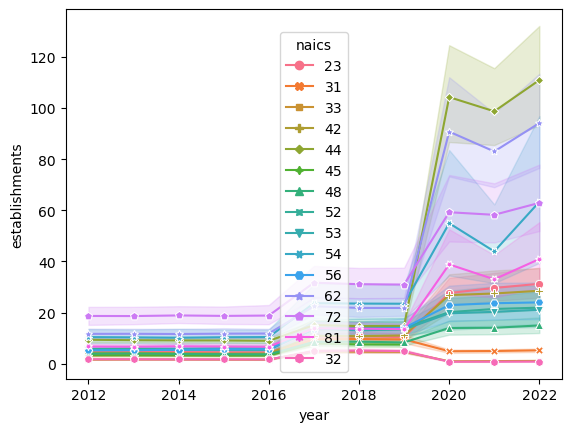

In [4]:
# Plotting the line graph using Seaborn
sns.lineplot(data=df12_22, x='year', y='establishments', hue = "naics", style='naics', markers=True, dashes=False)

# Adding labels and title
#plt.xlabel('X-axis Label')
#plt.ylabel('Y-axis Label')
#plt.title('Line Graph Example')

#plt.figure(figsize=(15, 10))

# Displaying the plot
#plt.show()

In [5]:
# Set the aesthetic style of the plots
#sns.set_style("whitegrid")

#plt.figure(figsize=(10, 6))  # Set the figure size
#sns.barplot(x="year", y="establishments", hue="naics", data=df13_23)

#plt.title('Number of Establishments per Industry by Year')
#plt.xlabel('Year')
#plt.ylabel('Number of Establishments')

#plt.show()

In [6]:
#pivot_df = df13_23.pivot_table(index='year', columns='naics', values='establishments', aggfunc = "sum")

#fig, ax = plt.subplots(figsize=(10, 6))

#bottoms = [0] * len(years)
#for industry in industries:
    #ax.bar(year, pivot_df[industry], bottom=bottoms, label=industry)
    #bottoms += pivot_df[industry].values  # Update the bottoms for the next industry

#ax.set_title('Stacked Number of Establishments per Industry by Year')
#ax.set_xlabel('Year')
#ax.set_ylabel('Number of Establishments')
#ax.legend(title='Industry')

#plt.show()

<Figure size 1000x600 with 0 Axes>

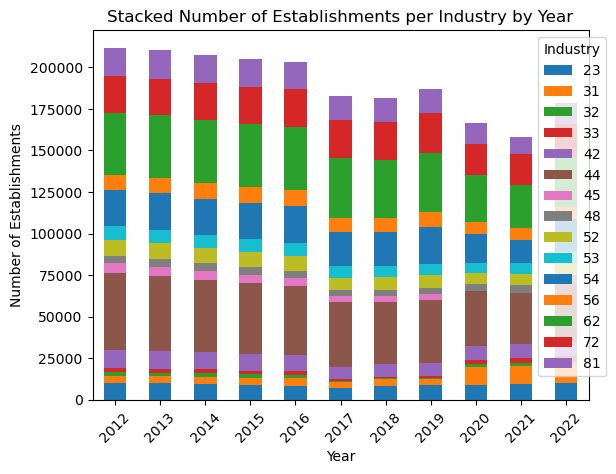

In [7]:
pivot_df = df12_22.pivot_table(index='year', columns='naics', values='establishments', aggfunc = "sum")

# Plotting directly from the pivot_table DataFrame
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)  # The index of pivot_df (Year) is used for the x-axis

plt.title('Stacked Number of Establishments per Industry by Year')
plt.xlabel('Year')  # This is technically redundant if 'Year' is clearly labeled from the DataFrame's index
plt.ylabel('Number of Establishments')
plt.legend(title='Industry')
plt.xticks(rotation=45)  # Improve label readability

plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.show()